# PREDICTING CO2 EMISSIONS USING MULTIVARIATE LINEAR REGRESSION

***

In [2]:
import piplite
await piplite.install (['pandas'])
await piplite.install (['numpy'])
await piplite.install (['matplotlib'])
await piplite.install (['scikit-learn'])

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

In [8]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [13]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [14]:
await download(path, "FuelConsumption.csv")
path="FuelConsumption.csv"

In [38]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Summarizing the data

In [36]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
cdf = df[["ENGINESIZE","CYLINDERS", 'FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [20]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


## Visualizing the features using scatterplots

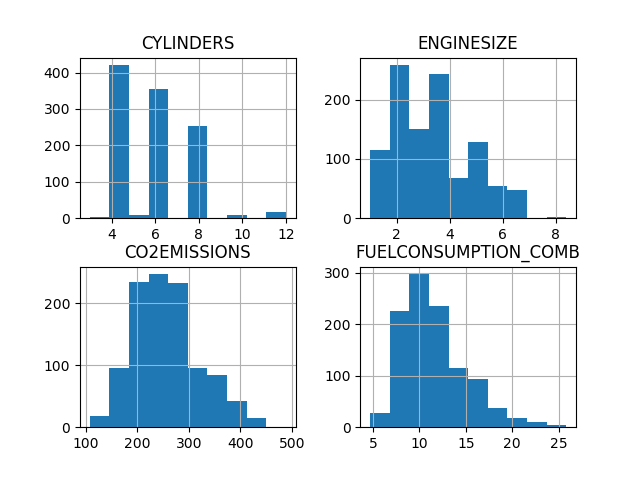

<Figure size 640x480 with 0 Axes>

In [37]:
viz =cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

## Plotting each of the features against "CO2EMMISSIONS"

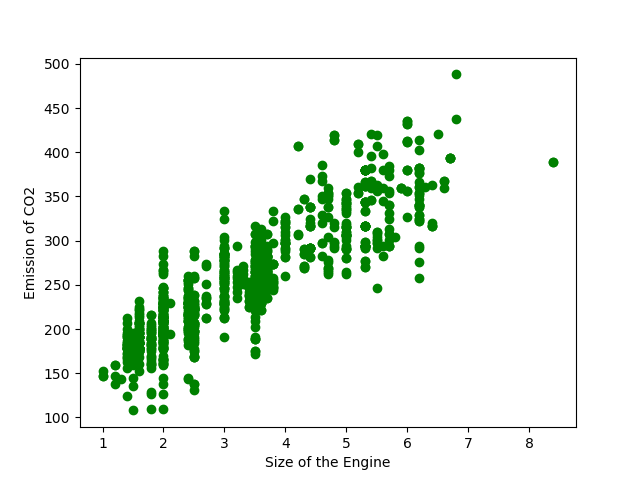

<Figure size 640x480 with 0 Axes>

In [25]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='green')
plt.xlabel('Size of the Engine')
plt.ylabel('Emission of CO2')
plt.show()

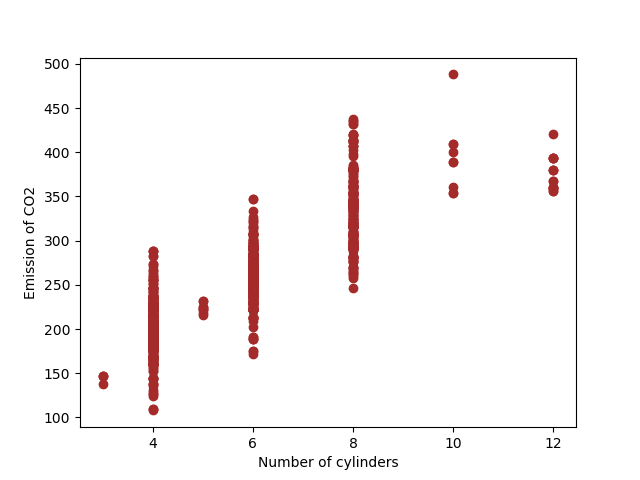

<Figure size 640x480 with 0 Axes>

In [28]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='brown')
plt.xlabel('Number of cylinders')
plt.ylabel('Emission of CO2')
plt.show()

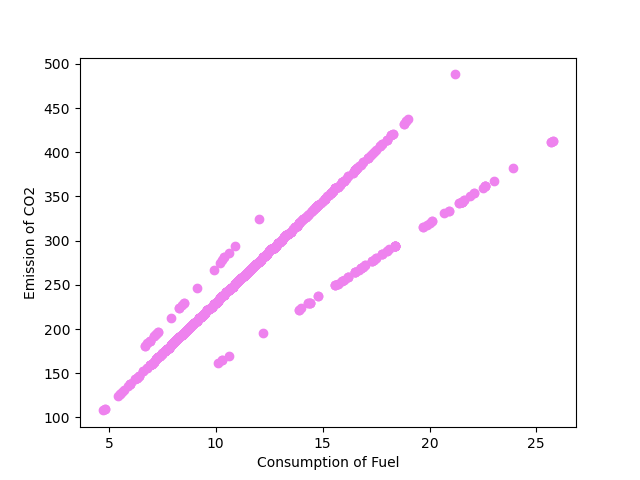

<Figure size 640x480 with 0 Axes>

In [31]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='violet')
plt.xlabel('Consumption of Fuel')
plt.ylabel('Emission of CO2')
plt.show()

## Creating Train and Test dataset

In [30]:
msk = np.random.rand(len(df))< 0.8
train = cdf[msk]
test = cdf[~msk]

## Modeling using Sklearn package

In [47]:
from sklearn import linear_model
regression = linear_model.LinearRegression()

In [49]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regression.fit(x,y)

LinearRegression()

## Co-efficients

In [50]:
print("Co-efficients: ", regression.coef_)

Co-efficients:  [[11.92410152  7.13892637  9.25066527]]


In [45]:
y_hat= regression.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


## Evaluation Metrics

In [46]:
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regression.score(x, y))

Residual sum of squares: 544.59
Variance score: 0.87


# RESULT
***

####  Explained Variance Regression Score = 0.87 

- __Explained variance__  is used to measure the discrepancy between a model and actual data. In other words, it’s the part of the model’s total variance that is explained by factors that are actually present and isn’t due to error variance.

- **Higher percentages of explained variance** indicates a stronger strength of association. It means that model make better predictions.
***